In [3]:
'''import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt

(train_x, train_y) , (test_x, test_y) = mnist.load_data()
#train_x = train_x.astype('float32') / 255
#test_x = test_x.astype('float32') / 255
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.load_weights("mnist-model.h5")
#model.fit(train_x,train_y,batch_size=32,epochs=10,verbose=1)
#model.save("mnistmodel.h5")
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
10000/10000 [==============================] - 0s 24us/step
Accuracy:  0.9614


Class:  1


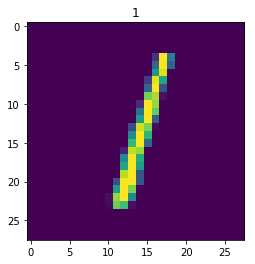

In [9]:
from keras.models import load_model
from keras.models import model_from_json
from keras.preprocessing import image
import numpy as np
from PIL import Image
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import PIL.ImageOps    
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
test_images = test_images.reshape(10000,784)

json_file = open('modelJSON.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
loaded_model.load_weights("mnist-modelJSON.h5")

print("Loaded model from disk")
loaded_model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#accuracy = loaded_model.evaluate(x=test_images,y=test_labels,batch_size=32)
#print("Accuracy: ",accuracy[1])

Loaded model from disk


<class 'PIL.Image.Image'>
(1, 784)
Class:  5


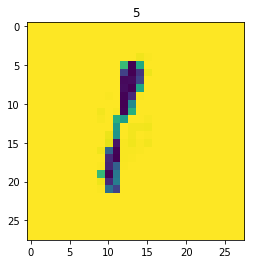

In [20]:
#img = test_x[9999]
img = image.load_img('C:/Users/Zainab/Desktop/Flask3/cnn/mni/1.png',target_size=(28, 28),color_mode="grayscale")
print(type(img))
img=image.img_to_array(img)


test_img = img.reshape(1,784)

print(test_img.shape)
img_class = loaded_model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()